In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib  import * 
from scipy import stats
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("DataTrained/census_income.csv")

In [3]:
df.shape

(32560, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [7]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [8]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

We can see '?' in the data. It does not pick '?' as missing values as they are encoded as strings instead of NaN.

let's replace '?' with most repeated values in the column using mode. 

In [9]:
df["Workclass"][df["Workclass"] == " ?"] = df["Workclass"].mode()[0]
df["Occupation"][df["Occupation"] == " ?"] = df["Occupation"].mode()[0]
df["Native_country"][df["Native_country"] == " ?"] = df["Native_country"].mode()[0]

In [10]:
display(df.isnull().any())

Age               False
Workclass         False
Fnlwgt            False
Education         False
Education_num     False
Marital_status    False
Occupation        False
Relationship      False
Race              False
Sex               False
Capital_gain      False
Capital_loss      False
Hours_per_week    False
Native_country    False
Income            False
dtype: bool

# EDA

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


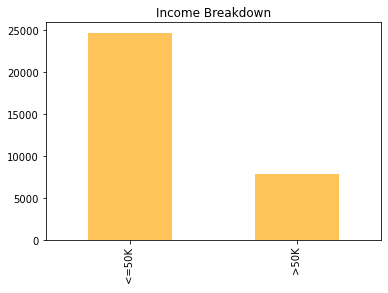

In [11]:
df.Income.value_counts().plot(kind='bar', color="orange", alpha=.65)
plt.title("Income Breakdown")
print(df.Income.value_counts())

In [12]:
groupby_Occupation = df.groupby(by = ["Income"])["Occupation"]
print(groupby_Occupation.value_counts())

Income  Occupation        
 <=50K   Prof-specialty       3933
         Adm-clerical         3262
         Craft-repair         3170
         Other-service        3158
         Sales                2667
         Exec-managerial      2098
         Machine-op-inspct    1752
         Handlers-cleaners    1284
         Transport-moving     1277
         Farming-fishing       879
         Tech-support          645
         Protective-serv       438
         Priv-house-serv       148
         Armed-Forces            8
 >50K    Prof-specialty       2050
         Exec-managerial      1968
         Sales                 983
         Craft-repair          929
         Adm-clerical          507
         Transport-moving      320
         Tech-support          283
         Machine-op-inspct     250
         Protective-serv       211
         Other-service         137
         Farming-fishing       115
         Handlers-cleaners      86
         Armed-Forces            1
         Priv-house-serv    

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Adm-clerical'),
  Text(1, 0, ' Armed-Forces'),
  Text(2, 0, ' Craft-repair'),
  Text(3, 0, ' Exec-managerial'),
  Text(4, 0, ' Farming-fishing'),
  Text(5, 0, ' Handlers-cleaners'),
  Text(6, 0, ' Machine-op-inspct'),
  Text(7, 0, ' Other-service'),
  Text(8, 0, ' Priv-house-serv'),
  Text(9, 0, ' Prof-specialty'),
  Text(10, 0, ' Protective-serv'),
  Text(11, 0, ' Sales'),
  Text(12, 0, ' Tech-support'),
  Text(13, 0, ' Transport-moving')])

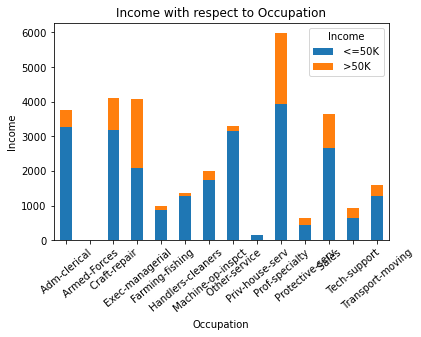

In [13]:
pd.crosstab(df.Occupation,df.Income).plot(kind='bar', stacked=True)
plt.title('Income with respect to Occupation')
plt.xlabel('Occupation')
plt.ylabel('Income')
plt.xticks(rotation=40)

For Income <=50K   Adm-clerical,Craft-repair,Other-service Occupations are more in number 

For Income >50K    Exec-managerial,Prof-specialty Occupations are more in number

In [14]:
groupby_Workclass = df.groupby(by = ["Income"])["Workclass"]
print(groupby_Workclass.value_counts())

Income  Workclass        
 <=50K   Private             19378
         Self-emp-not-inc     1817
         Local-gov            1476
         State-gov             944
         Federal-gov           589
         Self-emp-inc          494
         Without-pay            14
         Never-worked            7
 >50K    Private              5154
         Self-emp-not-inc      724
         Self-emp-inc          622
         Local-gov             617
         Federal-gov           371
         State-gov             353
Name: Workclass, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, ' Federal-gov'),
  Text(1, 0, ' Local-gov'),
  Text(2, 0, ' Never-worked'),
  Text(3, 0, ' Private'),
  Text(4, 0, ' Self-emp-inc'),
  Text(5, 0, ' Self-emp-not-inc'),
  Text(6, 0, ' State-gov'),
  Text(7, 0, ' Without-pay')])

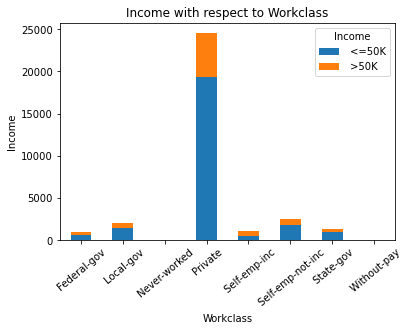

In [15]:
pd.crosstab(df.Workclass,df.Income).plot(kind='bar', stacked=True)
plt.title('Income with respect to Workclass')
plt.xlabel('Workclass')
plt.ylabel('Income')
plt.xticks(rotation=40)

We can see for income <=50K there are more number of Private employees 

 Male      21789
 Female    10771
Name: Sex, dtype: int64


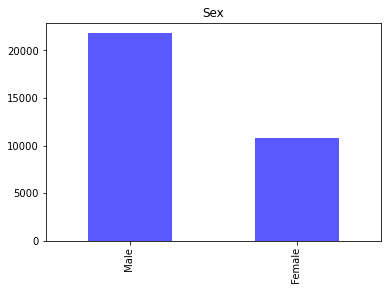

In [16]:
df.Sex.value_counts().plot(kind='bar', color="blue", alpha=.65)
plt.title("Sex")
print(df.Sex.value_counts())

In [17]:
groupby_Sex = df.groupby(by = ["Income"])["Sex"]
print(groupby_Sex.value_counts())

Income  Sex    
 <=50K   Male      15127
         Female     9592
 >50K    Male       6662
         Female     1179
Name: Sex, dtype: int64


(array([0, 1]), [Text(0, 0, ' Female'), Text(1, 0, ' Male')])

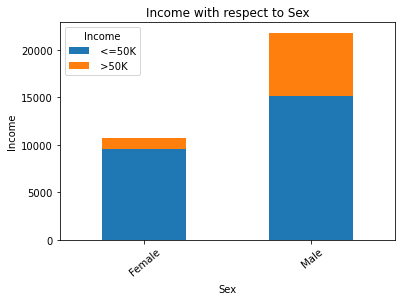

In [18]:
pd.crosstab(df.Sex,df.Income).plot(kind='bar', stacked=True)
plt.title('Income with respect to Sex')
plt.xlabel('Sex')
plt.ylabel('Income')
plt.xticks(rotation=40)

In [19]:
groupby_Sex_Occupation = df.groupby(by = ["Income", "Sex"])["Occupation"]
print(groupby_Sex_Occupation.value_counts())

Income  Sex      Occupation        
 <=50K   Female   Adm-clerical         2325
                  Prof-specialty       1919
                  Other-service        1749
                  Sales                1175
                  Exec-managerial       879
                  Machine-op-inspct     530
                  Tech-support          303
                  Craft-repair          202
                  Handlers-cleaners     160
                  Priv-house-serv       140
                  Transport-moving       81
                  Protective-serv        66
                  Farming-fishing        63
         Male     Craft-repair         2968
                  Prof-specialty       2014
                  Sales                1492
                  Other-service        1409
                  Machine-op-inspct    1222
                  Exec-managerial      1219
                  Transport-moving     1196
                  Handlers-cleaners    1124
                  Adm-clerical          

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' Protective-serv'),
  Text(12, 0, ' Armed-Forces'),
  Text(13, 0, ' Priv-house-serv')])

<Figure size 1440x1080 with 0 Axes>

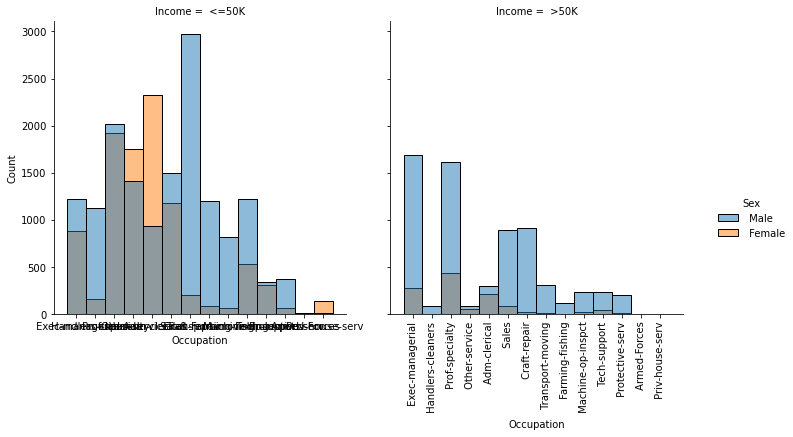

In [20]:
plt.figure(figsize = (20,15))

sns.displot(data = df, x = "Occupation", hue = "Sex", col = "Income")
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Age', ylabel='Count'>

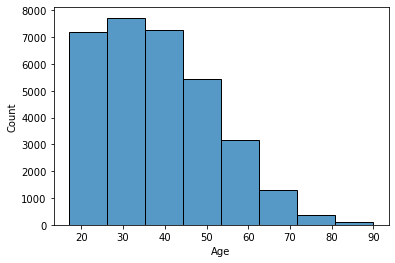

In [21]:
plt.figure()
sns.histplot(data = df, x = 'Age', bins = 8)

From above histogram, we can get to know that most of the people fall in the working age between 25 and 45.

In [22]:
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [23]:
groupby_Sex_Education = df.groupby(by = ["Income", "Education"])["Sex"]
print(groupby_Sex_Education.value_counts())

Income  Education      Sex    
 <=50K   10th           Male       579
                        Female     292
         11th           Male       691
                        Female     424
         12th           Male       260
                                  ... 
 >50K    Masters        Female     179
         Prof-school    Male       381
                        Female      42
         Some-college   Male      1190
                        Female     197
Name: Sex, Length: 61, dtype: int64


<AxesSubplot:xlabel='Workclass', ylabel='count'>

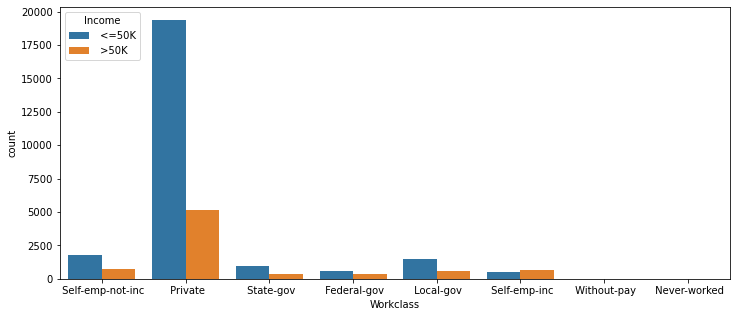

In [24]:
fig = plt.figure(figsize=(12,5))
sns.countplot(df.Workclass, hue=df.Income)

<=50K earners are highest within Private workclass.

50K+ earners are higher than <=50K in only Self-emp-inc level. At all other levels, the trends are reverse.

We can see levels with <5% data, let's group some levels

<AxesSubplot:>

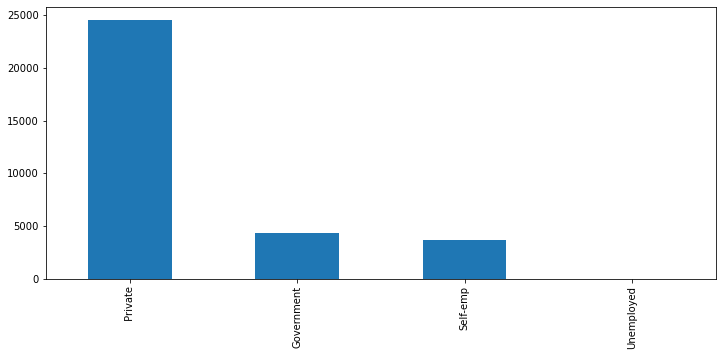

In [25]:
mapper = {' Self-emp-not-inc': 'Self-emp', 
                                             ' Self-emp-inc': 'Self-emp', 
                                             ' Local-gov': 'Government', 
                                            ' State-gov':'Government', 
                                             ' Federal-gov':'Government',
                                             ' Without-pay':'Unemployed',
                                            ' Never-worked':'Unemployed'}
df['Workclass'] = df['Workclass'].map(mapper).fillna(df['Workclass'])
# Re-engineered 'Workclass' feature

fig = plt.figure(figsize=(12,5))
df['Workclass'].value_counts().plot(kind='bar')

In [26]:
df['Workclass'].unique()

array(['Self-emp', ' Private', 'Government', 'Unemployed'], dtype=object)

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

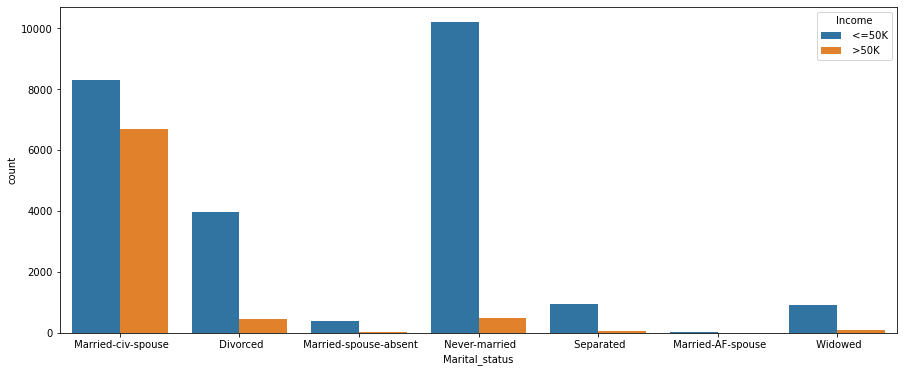

In [27]:
fig = plt.figure(figsize=(15,6))
sns.countplot(df['Marital_status'], hue=df.Income)

<=50K earners are highest across Never married and Married-civ-spouse.

50K+ earners are highest across Married civ Spouse and low across others.

<AxesSubplot:>

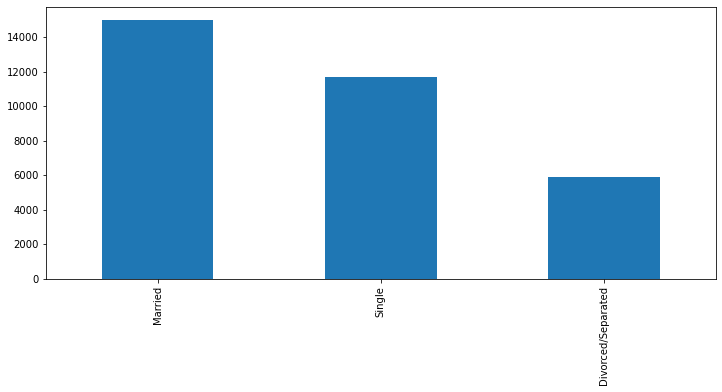

In [28]:
map_marriage = { ' Never-married': 'Single',
                                                          ' Widowed':'Single',
                                                          ' Divorced': 'Divorced/Separated',
                                                          ' Separated':'Divorced/Separated',
                                                          ' Married-spouse-absent':'Divorced/Separated',
                                                          ' Married-AF-spouse':'Married',
                                                          ' Married-civ-spouse':'Married'}

df['Marital_status'] = df['Marital_status'].map(map_marriage).fillna(df['Marital_status'])
# Re-engineered 'Marital_status' feature

fig = plt.figure(figsize=(12,5))
df['Marital_status'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Education', ylabel='count'>

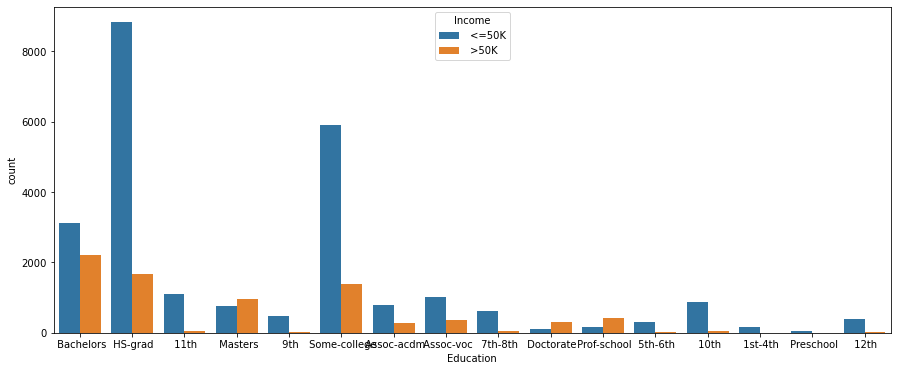

In [29]:
fig = plt.figure(figsize=(15,6))
sns.countplot(df['Education'], hue=df.Income)

<AxesSubplot:xlabel='Education_num', ylabel='count'>

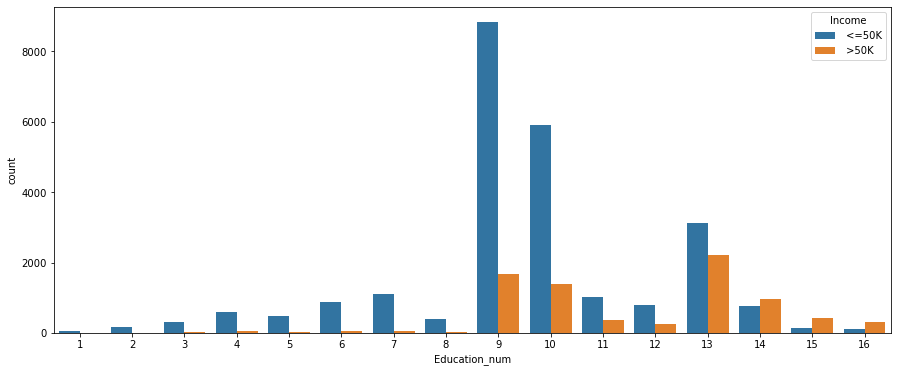

In [30]:
fig = plt.figure(figsize=(15,6))
sns.countplot(df['Education_num'], hue=df.Income)

Except for Masters, Prof school and Doctorate, other educations show that <=50K earners are more than 50K+ earners

<AxesSubplot:>

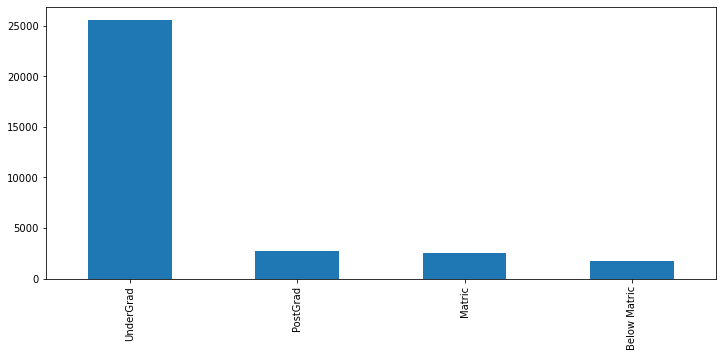

In [31]:
map_Education = {' Preschool': 'Below Matric',
                                                ' 1st-4th': 'Below Matric',
                                                ' 5th-6th':'Below Matric',
                                                ' 7th-8th': 'Below Matric',
                                                ' 9th':'Below Matric',
                                                ' 10th':'Matric',
                                                ' 11th':'Matric',
                                                ' 12th':'Matric',
                                                ' HS-grad':'UnderGrad',
                                                ' Some-college':'UnderGrad',
                                                ' Assoc-voc':'UnderGrad',
                                                ' Assoc-acdm':'UnderGrad',
                                                ' Bachelors':'UnderGrad',
                                                ' Masters':'PostGrad',
                                                ' Prof-school':'PostGrad',
                                                ' Doctorate':'PostGrad'
                                                }


df['Education'] = df['Education'].map(map_Education).fillna(df['Education'])
# Re-engineered 'Education' feature

fig = plt.figure(figsize=(12,5))
df['Education'].value_counts().plot(kind='bar')

In [32]:
numeric_columns = ['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']

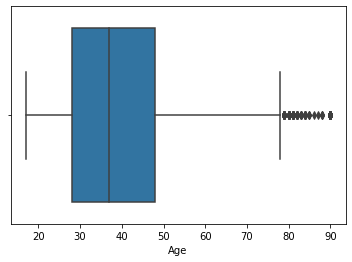

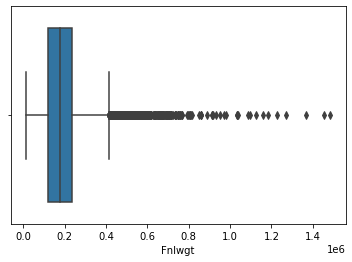

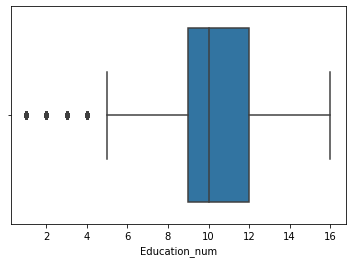

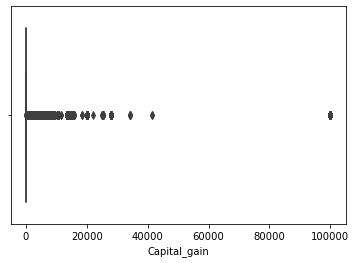

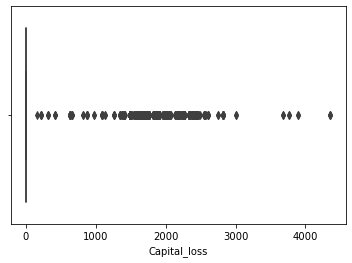

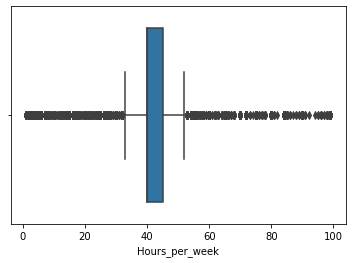

In [33]:
for i in numeric_columns:
  sns.boxplot(x = df[i])
  plt.show()


In [34]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp,83311,UnderGrad,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,UnderGrad,9,Divorced/Separated,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,Matric,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,UnderGrad,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,PostGrad,14,Married,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [35]:
df.shape

(32560, 15)

#### percentage of outliers in every columns

In [36]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [37]:
((((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum())/32560)*100

Age                0.439189
Capital_gain       8.326167
Capital_loss       4.665233
Education          0.000000
Education_num      3.679361
Fnlwgt             3.046683
Hours_per_week    27.665848
Income             0.000000
Marital_status     0.000000
Native_country     0.000000
Occupation         0.000000
Race               0.000000
Relationship       0.000000
Sex                0.000000
Workclass          0.000000
dtype: float64

setting a quantile to get rid of some of the outlier values and filtered accordingly.

In [38]:
q_low = df["Fnlwgt"].quantile(0.01)
q_hi  = df["Fnlwgt"].quantile(0.99)
df = df[(df["Fnlwgt"] < q_hi) & (df["Fnlwgt"] > q_low)]

In [39]:
df = df[(df['Education_num'] <= 16) | (df['Education_num'] >= 4)]
df = df[df['Capital_gain'] <= 60000]
df = df[df['Capital_loss'] <= 3000]
df = df[(df['Hours_per_week'] <= 80) | (df['Hours_per_week'] >= 20)]

I have set a quantile to get rid of some of the outlier values and filtered accordingly.

ther columns, I got rid of the outliers not with quantile, but according to the filters

#### Let's separate the numerical columns from the categorical

In [40]:
categorical_data = []
numerical_data = []

for i,j in enumerate(df.dtypes):
    if j == object:
        categorical_data.append(df.iloc[:, i])
    else :
        numerical_data.append(df.iloc[:, i])
        
categorical_data = pd.DataFrame(categorical_data).transpose()
numerical_data = pd.DataFrame(numerical_data).transpose()

In [41]:
categorical_data.isnull().sum().sort_values()


Workclass         0
Education         0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Native_country    0
Income            0
dtype: int64

In [42]:
categorical_data.head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,Self-emp,UnderGrad,Married,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,UnderGrad,Divorced/Separated,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,Matric,Married,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,UnderGrad,Married,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,PostGrad,Married,Exec-managerial,Wife,White,Female,United-States,<=50K


In [43]:
# transform the target column

target_values = {' <=50K': 0, ' >50K': 1 }

target = categorical_data['Income']
categorical_data.drop('Income', axis=1, inplace=True)

target = target.map(target_values)

In [44]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: Income, dtype: int64

we are going to use LabelEncoder :

what it is actually do it encode labels with value between 0 and n_classes-1

In [45]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()

In [46]:
# transform other columns

for i in categorical_data:
    categorical_data[i] = le.fit_transform(categorical_data[i])

In [47]:
categorical_data.head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country
0,2,3,1,3,0,4,1,38
1,0,3,0,5,1,4,1,38
2,0,1,1,5,0,2,1,38
3,0,3,1,9,5,2,0,4
4,0,2,1,3,5,4,0,38


In [48]:
df = pd.concat([categorical_data, numerical_data, target], axis=1)

In [49]:
df.head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
0,2,3,1,3,0,4,1,38,50,83311,13,0,0,13,0
1,0,3,0,5,1,4,1,38,38,215646,9,0,0,40,0
2,0,1,1,5,0,2,1,38,53,234721,7,0,0,40,0
3,0,3,1,9,5,2,0,4,28,338409,13,0,0,40,0
4,0,2,1,3,5,4,0,38,37,284582,14,0,0,40,0


### Modelbuilding using select percentile feature

In [50]:
from sklearn.feature_selection import SelectPercentile, chi2

In [51]:
X = pd.concat([categorical_data, numerical_data], axis=1)
y = target 

SPercentile = SelectPercentile(score_func=chi2, percentile = 80)
SPercentile = SPercentile.fit(X,y)


In [52]:
# seperate the features to check pvalue

cols = SPercentile.get_support(indices=True) # to return index value instead of boolean
print('features index = ',cols)

features = X.columns[cols]
print('features  = ',list(features))

features index =  [ 0  2  3  4  6  8  9 10 11 12 13]
features  =  ['Workclass', 'Marital_status', 'Occupation', 'Relationship', 'Sex', 'Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


In [53]:
df_scores= pd.DataFrame({'features':X.columns, 'Chi2Score':SPercentile.scores_, 'pValue':SPercentile.pvalues_})

df_scores.sort_values(by='Chi2Score',ascending=False)

,features,Chi2Score,pValue
11,Capital_gain,3.393768e+07,0.000000e+00
12,Capital_loss,1.410503e+06,0.000000e+00
9,Fnlwgt,1.352681e+05,0.000000e+00
8,Age,8.221777e+03,0.000000e+00
13,Hours_per_week,6.067799e+03,0.000000e+00
4,Relationship,3.477845e+03,0.000000e+00
10,Education_num,2.261047e+03,0.000000e+00
0,Workclass,6.297202e+02,5.750017e-139
6,Sex,4.783584e+02,4.863624e-106
2,Marital_status,2.634526e+02,3.033570e-59


In [54]:
# creating subset of selected features

X=df[features]

y = target

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [56]:
x_train, x_pred, y_train, y_pred = train_test_split(X_scaler,y, test_size=0.2,random_state=55)


In [57]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## LogisticRegression

In [58]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [59]:
pred_lr = lr.predict(x_pred)

In [60]:
from sklearn.metrics  import f1_score 
print("Accuracy score: {}".format(accuracy_score(y_pred, pred_lr)*100))
print("F1 score: {}".format(f1_score(y_pred, pred_lr)))
print("="*80)
print(classification_report(y_pred, pred_lr))

Accuracy score: 82.46691871455577
F1 score: 0.5495750708215298
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4847
           1       0.70      0.45      0.55      1501

    accuracy                           0.82      6348
   macro avg       0.77      0.70      0.72      6348
weighted avg       0.81      0.82      0.81      6348



## Random Forest Classifier

In [61]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [62]:
pred_rf = rf.predict(x_pred)

In [63]:
print("Accuracy score: {}".format(accuracy_score(y_pred, pred_rf)*100))
print("F1 score: {}".format(f1_score(y_pred, pred_rf)))
print("="*80)
print(classification_report(y_pred, pred_rf))

Accuracy score: 86.26339004410838
F1 score: 0.683828861493836
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4847
           1       0.75      0.63      0.68      1501

    accuracy                           0.86      6348
   macro avg       0.82      0.78      0.80      6348
weighted avg       0.86      0.86      0.86      6348



## Decision Tree

In [64]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [65]:
pred_dt = dt.predict(x_pred)

In [66]:
print("Accuracy score: {}".format(accuracy_score(y_pred, pred_dt)*100))
print("F1 score: {}".format(f1_score(y_pred, pred_dt)))
print("="*80)
print(classification_report(y_pred, pred_dt))

Accuracy score: 81.0333963453056
F1 score: 0.6042077580539119
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      4847
           1       0.60      0.61      0.60      1501

    accuracy                           0.81      6348
   macro avg       0.74      0.74      0.74      6348
weighted avg       0.81      0.81      0.81      6348



## Gradient Boosted Classifier

In [68]:
gb = GradientBoostingClassifier()

In [69]:
gb.fit(x_train, y_train)
pred_gb = gb.predict(x_pred)

In [70]:
print("Accuracy score: {}".format(accuracy_score(y_pred, pred_gb)*100))
print("F1 score: {}".format(f1_score(y_pred, pred_gb)))
print("="*80)
print(classification_report(y_pred, pred_gb))

Accuracy score: 86.8935097668557
F1 score: 0.6860377358490566
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4847
           1       0.79      0.61      0.69      1501

    accuracy                           0.87      6348
   macro avg       0.84      0.78      0.80      6348
weighted avg       0.86      0.87      0.86      6348



# K-Fold Cross Validation

In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
scores_dt = cross_val_score(dt, X_scaler,y, cv=7,scoring = 'f1')
scores_gb = cross_val_score(gb, X_scaler,y, cv=7,scoring = 'f1')
scores_rf = cross_val_score(rf, X_scaler,y, cv=7,scoring = 'f1')

In [73]:
print("Decision Tree CV        : " , scores_dt.mean())
print("Gradient Boosting CV    : " , scores_gb.mean())
print("Random Forest   CV      : " , scores_rf.mean())

Decision Tree CV        :  0.6013790722979954
Gradient Boosting CV    :  0.6714215668667108
Random Forest   CV      :  0.6631709824518295


In [74]:
# import module
from tabulate import tabulate
# assign data
mydata_2 =[ ["Random Forest Classifier",f1_score(y_pred, pred_rf),scores_rf.mean()],
    ["Decision Tree",f1_score(y_pred, pred_dt),scores_dt.mean()],
    ["Gradient Boosted Classifier", f1_score(y_pred, pred_gb),scores_gb.mean()],
    
        ]

 
# create header
head = ["Model", "F1","F1_CV"]
 
# display table
print(tabulate(mydata_2, headers=head, tablefmt="grid"))
table = pd.DataFrame(mydata_2)

+-----------------------------+----------+----------+
| Model                       |       F1 |    F1_CV |
+=============================+==========+==========+
| Random Forest Classifier    | 0.683829 | 0.663171 |
+-----------------------------+----------+----------+
| Decision Tree               | 0.604208 | 0.601379 |
+-----------------------------+----------+----------+
| Gradient Boosted Classifier | 0.686038 | 0.671422 |
+-----------------------------+----------+----------+


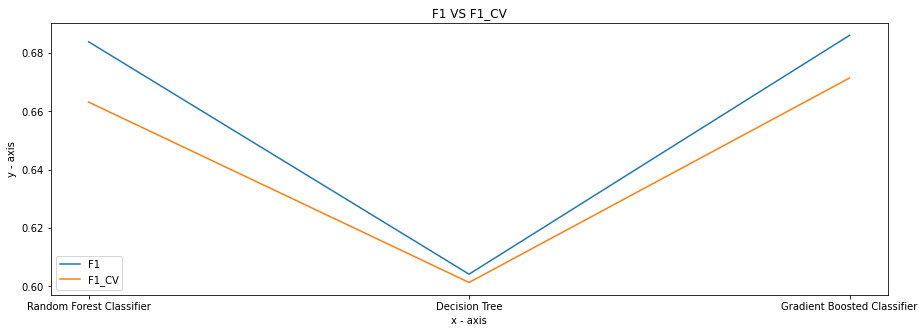

In [75]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(table[0],table[1], label = "F1")
plt.plot(table[0],table[2], label = "F1_CV")
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('F1 VS F1_CV')
plt.legend()
plt.show()

# GradientBoosting Tree Using Grid Search

In [76]:
from sklearn.model_selection import GridSearchCV

param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=10)
gsearch1.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=GradientBoostingClassifier(max_depth=8,
                                                  max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=4, param_grid={'n_estimators': range(20, 81, 10)},
             scoring='roc_auc')

In [77]:
final_model = gsearch1.best_estimator_
final_model

GradientBoostingClassifier(max_depth=8, max_features='sqrt',
                           min_samples_leaf=50, min_samples_split=500,
                           n_estimators=80, random_state=10, subsample=0.8)

In [78]:
#Training the model
tree_clas = GradientBoostingClassifier(max_depth=8, max_features='sqrt',
                           min_samples_leaf=50, min_samples_split=500,
                           n_estimators=80, random_state=10, subsample=0.8)
tree_clas.fit(x_train, y_train)
y_predict = tree_clas.predict(x_pred)

In [79]:
print("Accuracy score: {}".format(accuracy_score(y_pred, y_predict)*100))
print("F1 score: {}".format(f1_score(y_pred, y_predict)))
print("="*80)
print(classification_report(y_pred, y_predict))

Accuracy score: 87.38185255198488
F1 score: 0.7111431662459431
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4847
           1       0.78      0.66      0.71      1501

    accuracy                           0.87      6348
   macro avg       0.84      0.80      0.82      6348
weighted avg       0.87      0.87      0.87      6348



We can see that for Gradient Boosting got the best F1 score.